# Vehicle Insurance Interest Response Classification

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Problem Statement 

**An insurance company has provided Health Insurance to its customers now they want a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**

## Data

|Variable|Definition|
|-----|-----|
|id	|Unique ID for the customer|
|Gender	|Gender of the customer|
|Age	|Age of the customer|
|Driving_License	|0 : Customer does not have DL, 1 : Customer already has DL|
|Region_Code	|Unique code for the region of the customer|
|Previously_Insured	|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|Vehicle_Age	|Age of the Vehicle|
|Vehicle_Damage	|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|Annual_Premium	|The amount customer needs to pay as premium in the year|
|PolicySalesChannel	|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|Vintage	|Number of Days, Customer has been associated with the company|
|Response	|1 : Customer is interested, 0 : Customer is not interested|

### Data Source: [Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction) 

# Resources:
- [Handle imbalance classes](https://elitedatascience.com/imbalanced-classes)
- [One-Hot Encoding Pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
  - [drop_first=True discussion#1](https://datascience.stackexchange.com/questions/28353/always-drop-the-first-column-after-performing-one-hot-encoding)
  - [drop_first=True discussion#2](https://www.kaggle.com/c/instant-gratification/discussion/92817)
- [Seaborn percentage in countplot](https://github.com/mwaskom/seaborn/issues/1027)


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import resample,shuffle

## Read the data

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.shape

(381109, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Insight:
Seems like data is clean, without any missing values

## Summary of the data


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Insight:
- average customer age is ~38 years old
- almost all have driving license
- around half have previous vehicle insurance cover
- looks like a class imbalance data set

## Get a count of the target variable and note down your observations

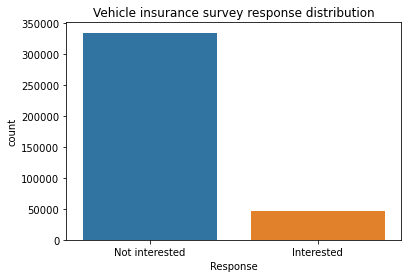

In [6]:
sns.countplot(x=data.Response)
plt.title('Vehicle insurance survey response distribution')
plt.xticks(ticks=[0,1],labels=['Not interested','Interested'])
plt.show()

## Insight:
- class imbalance

## What is the ratio of male and female in our dataset?

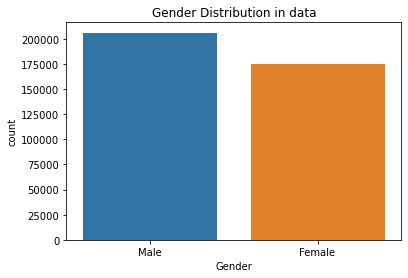

In [7]:
sns.countplot(x=data.Gender)
plt.title('Gender Distribution in data')
plt.show()

## Insight
- fairly equal distribution

## Check the gender ratio in the interested customers, what are your observations?

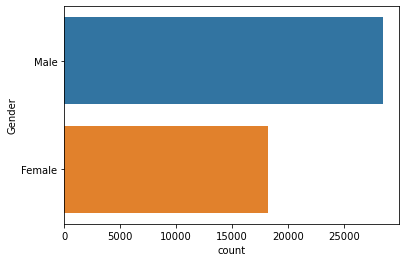

In [8]:
filter_df = data.Gender.loc[data.Response==1]
sns.countplot(y=filter_df)

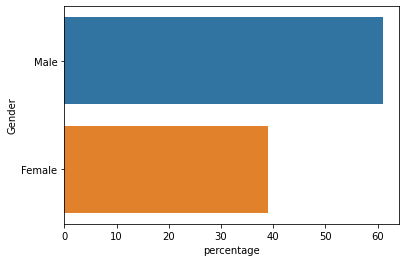

In [9]:
# use of estimator
sns.barplot(y=filter_df,
            x=filter_df.index,
            estimator=lambda grp: len(grp) / float(len(filter_df)) * 100)
plt.xlabel('percentage')
plt.show()

## Insight:
- Males are more likely to be interested in Vehicle Insurance than Females

## Find out the distribution of customers age

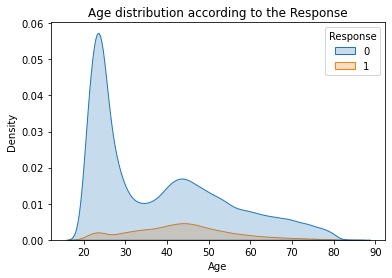

In [10]:
sns.kdeplot(x="Age",
           hue='Response',
           data=data,
           shade=True)
plt.title('Age distribution according to the Response')
plt.show()

if you are facing issues with kdeplot ensure you have latest version of seaborn library installed `pip install -U seaborn`

In [11]:
!pip freeze | grep seaborn

seaborn==0.11.0


## Insight:
- young people below 30 years are not interested, second group 40-50 years are not interested 
- middle aged people 30-60 years are interested

Inshort, age plays a role in determining interest, below 30 is a strong no, but between 40-50 there may be a yes or a no.

## Which regions have people applied from more?

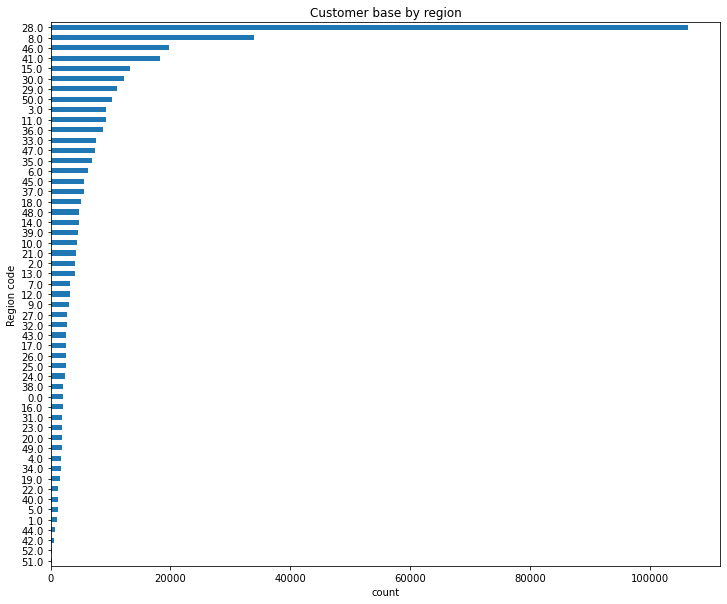

In [12]:
data.Region_Code.value_counts(ascending=True).plot.barh(figsize=(12,10))
plt.title('Customer base by region')
plt.xlabel('count')
plt.ylabel('Region code')
plt.show()

## Insight:
- Region code 28 is the region with high number of existing customers
- its a diminishing curve

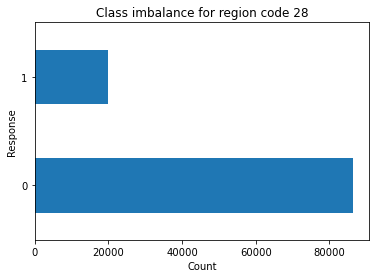

In [13]:
data.loc[data.Region_Code==28.0,'Response'].value_counts().plot.barh(title='Class imbalance for region code 28')
plt.ylabel('Response')
plt.xlabel('Count')
plt.show()

There's still an imbalance in region coded as `28`

## Check the ratio of previously insured, note down your observations

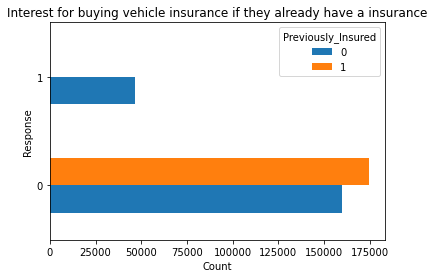

In [14]:
pd.crosstab(data.Response, data.Previously_Insured).plot.barh(title='Interest for buying vehicle insurance if they already have a insurance')
plt.xlabel('Count')
plt.show()

## Insight
- people who are not insured previsouly are mostly like to be interested

## How old are most of the vehicles? Does vehicle damage has any effect on the Response variable?

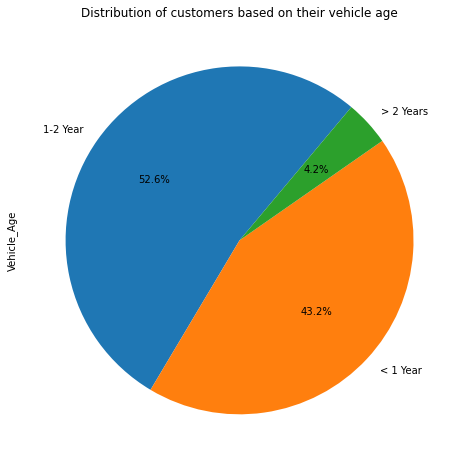

In [15]:
(data
 .Vehicle_Age
 .value_counts()
 .plot.pie(startangle=50,
          figsize=(8,8),
          autopct="%0.1f%%",
          title='Distribution of customers based on their vehicle age')
)
plt.show()

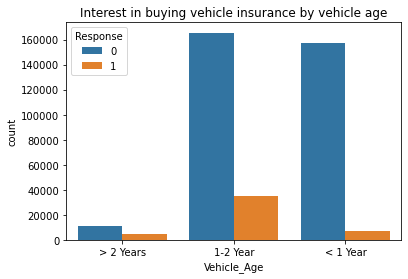

In [16]:
sns.countplot(x=data.Vehicle_Age,
             hue=data.Response)
plt.title('Interest in buying vehicle insurance by vehicle age')
plt.show()

## Insight:
More than half of the customer in the data have vehicles aged 1-2 years old and they are the ones who are mostly interested

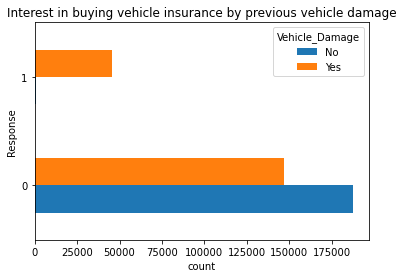

In [17]:
pd.crosstab(data.Response, data.Vehicle_Damage).plot.barh(title='Interest in buying vehicle insurance by previous vehicle damage')
plt.xlabel('count')
plt.show()

## Insight:
- customer whose vehicle had past damages are mostly interested

## Plot a correlation matrix, remove the two least correlated features


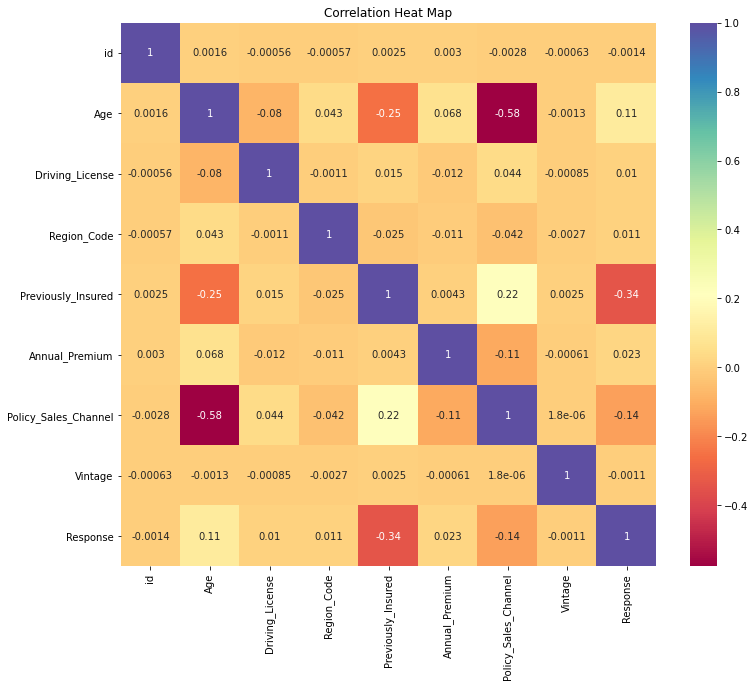

In [18]:
plt.figure(figsize=(12,10))

sns.heatmap(data.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Heat Map')
plt.show()

In [19]:
data.corr()['Response'].sort_values()

Previously_Insured     -0.341170
Policy_Sales_Channel   -0.139042
id                     -0.001368
Vintage                -0.001050
Driving_License         0.010155
Region_Code             0.010570
Annual_Premium          0.022575
Age                     0.111147
Response                1.000000
Name: Response, dtype: float64

In [20]:
df_model = data.copy()
df_model.drop(['id', 'Vintage'], axis=1, inplace=True)
df_model.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Split the data into train and test, to avoid data leakage

In [21]:
X = df_model.drop(['Response'],axis=1) 

y = df_model.loc[:,'Response']

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## One Hot Encoding the categorical variables

In [22]:
train = pd.get_dummies(data = X_train, columns= ['Gender', 'Vehicle_Damage', 'Vehicle_Age'], drop_first=True)
test = pd.get_dummies(data = X_test, columns= ['Gender', 'Vehicle_Damage', 'Vehicle_Age'], drop_first=True)


## Lets fit a base model of Logistic regression, calculate accuracy, auc_roc score and print classification report.

## What are your observations? Are the results satisfactory?

In [23]:
logisticRegression = LogisticRegression(max_iter=1000)

logisticRegression.fit(train, y_train)

predictions = logisticRegression.predict(test)

print(accuracy_score(y_test, predictions))

0.8733698932066858


In [24]:
print(roc_auc_score(y_test, predictions))

0.5038488355619435


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.31      0.01      0.02      9523

    accuracy                           0.87     76222
   macro avg       0.59      0.50      0.48     76222
weighted avg       0.81      0.87      0.82     76222



## Let us upsample the class with less data so that our model can learn about the minority class

In [26]:
df = pd.concat([train,y_train],axis=1)
df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
332803,39,1,15.0,0,52906.0,55.0,0,1,0,0,1
116248,38,1,11.0,0,23038.0,26.0,1,1,0,0,0
255005,22,1,30.0,1,45318.0,152.0,1,0,1,0,0
317474,23,1,41.0,1,29132.0,151.0,0,0,1,0,0
344212,56,1,48.0,0,2630.0,154.0,1,1,0,1,0


In [27]:
# separating the two classes
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]

df_majority.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Response
116248,38,1,11.0,0,23038.0,26.0,1,1,0,0,0
255005,22,1,30.0,1,45318.0,152.0,1,0,1,0,0
317474,23,1,41.0,1,29132.0,151.0,0,0,1,0,0
344212,56,1,48.0,0,2630.0,154.0,1,1,0,1,0
26229,30,1,18.0,1,35118.0,152.0,1,0,1,0,0


In [28]:
df_minority.shape

(37187, 11)

In [29]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)
df_minority_upsampled.shape

(267700, 11)

In [30]:
df_majority.shape

(267700, 11)

In [31]:
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df.shape

(535400, 11)

In [32]:
balanced_df = shuffle(balanced_df)

## Split the predictors and the target variables

In [33]:
X_train = balanced_df.drop('Response',axis=1)
y_train = balanced_df['Response']

## Again fit a logistic regression model, find accuracy, auc_roc score and observe the results, have they improved?
## What are your observations?

In [34]:
logisticRegression2 = LogisticRegression()

logisticRegression2.fit(X_train, y_train)

predictions = logisticRegression2.predict(test)

print(accuracy_score(y_test, predictions))

0.6439741806827425


In [35]:
print(roc_auc_score(y_test, predictions))

0.7841039196693164


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66699
           1       0.26      0.97      0.41      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.64      0.70     76222



# Upsampling of minority class improved the model performace and lifted (increased) auroc, recall and f1-scores